# Módulo Plotting

Entre las funciones de SymPy tenemos [Plotting](https://docs.sympy.org/latest/modules/plotting.html), la cual nos permite realizar gráficas en dimensión 2 y 3. Este módulo está basado en el módulo [`matplotlib`](https://matplotlib.org/3.1.1/index.html).

### Graficar funciones en 2d

La estructura general para graficar una función es la siguiente:

`plot(expr, range, **kwargs)`

* `expr`: es la expresión de la función que queremos graficar. 

* `range`:  es una 3-tupla de la forma `(variable, a, b)`, donde `a` < `b` son los límites del rango en el queremos visualizar de nuestra gráfica.

*  `**kwargs`: son instrucciones adicionales del trazo de la gráfica: color, etiquetas, tipo de línea.

Supongamos que necesitamos graficar la función en una variable $f(x)= x$.

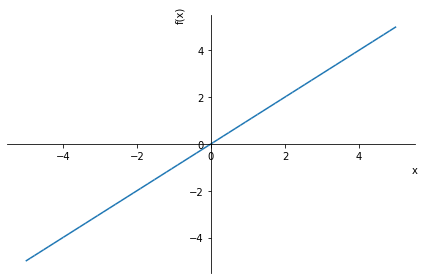

In [ ]:
# Gráfica de una funcion en una variable
from sympy import symbols
from sympy.plotting import plot
import matplotlib.pyplot as plt

x = symbols('x')

plot(x, (x, -5, 5))
plt.show()

Si queremos graficar más de una función en un mismo plano y con el mismo rango, lo que debemos hacer es agregar todas las funciones separadas por una coma.

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

h=ceiling(x)
m=floor(x)
n=frac(x)

In [ ]:
hx= lambdify(x,h, modules=['numpy'])
mx= lambdify(x,m, modules=['numpy'])
nx= lambdify(x,n, modules=['numpy'])
xVals = np.linspace(-3, 3,100)

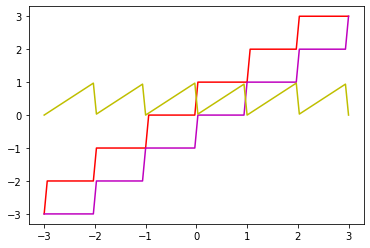

In [ ]:
plt.plot(xVals, hx(xVals), 'r')
plt.plot(xVals, mx(xVals), 'm')
plt.plot(xVals, nx(xVals), 'y')
plt.show()


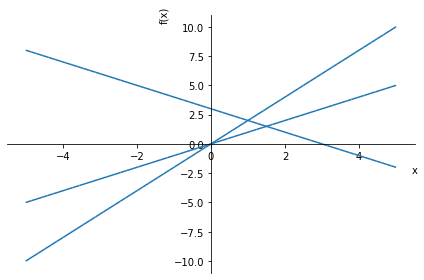

In [ ]:
# Gráficas de varias funciones en una variable
from sympy import symbols
from sympy.plotting import plot

x = symbols('x')

plot(x, 2*x, 3-x, (x, -5, 5))
plt.show()

Si queremos graficar varias funciones pero con diferente rango, debemos usar el formato:

`plot((funcion,rango), (funcion, rango))`

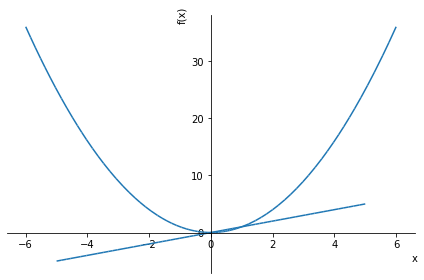

In [ ]:
# Gráficas de varias funciones en una variable con diferentes rango
from sympy import symbols
from sympy.plotting import plot

x = symbols('x')

plot((x**2, (x, -6, 6)), (x, (x, -5, 5)))
plt.show()

__EJERCICIO EN CLASE:__ 

*Graficar dos funciones en un mismo plano*. Escribe dos ejemplos, el primero con dos funciones distintas sobre el mismo rango y el segundo con dos funciones distintas sobre diferentes rangos.

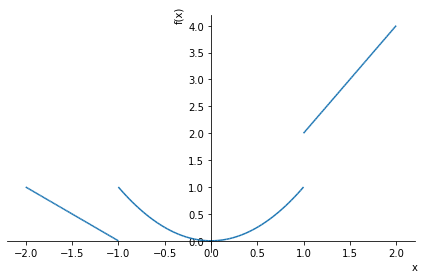

In [ ]:
#Escribe código aqui.

plot((-1-x, (x, -2, -1)), (x**2, (x, -1, 1)),(2*x, (x, 1, 2)))
plt.show()

### Graficar funciones en 3d

La estructura general es muy similar al caso 2d:

`plot3d(expr, range_x, range_y, **kwargs)`

* `expr`: expresión de la función que queremos graficar. 

* `range_x,range_y`:  son 3-tupla de la forma `(variable, a, b)`, donde `a` < `b` son los límites del rango en el queremos visualizar de nuestra gráfica.

*  `**kwargs`: son instrucciones adicionales del trazo de la gráfica: color, etiquetas, tipo de línea.

Supongamos que ahora tenemos una función en dos variables $f(x,y)$ y que queremos graficarla. 

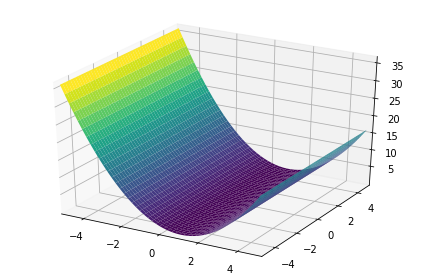

In [ ]:
# Gráfica de una función en dos variables 
from sympy import symbols
from sympy.plotting import plot3d

x , y = symbols('x y')

plot3d(x**2 -2*x+ 1, (x, -5, 5), (y, -5, 5))
plt.show()

## Graficar funciones implícitas en dos variables

También podemos graficar funciones implícitas o regiones del plano o espacio. La estructura es muy similar, solo que ahora debemos importar `plot_implicit` de SymPy y la función `Eq` con la cual podemos definir ecuaciones.

La estructura general es muy similar a lo visto anteriormente:

`plot_implicit(expr, (x , x_min, x_max), (y , y_min, y_max) , **kwargs)`

**Ejemplo:** Graficar $x + y = 1$.

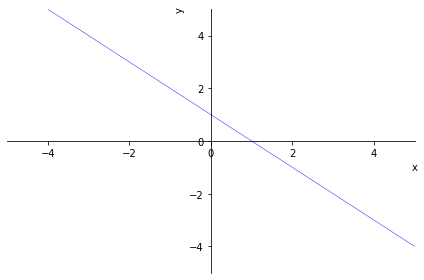

In [ ]:
# Gráfica de una función implicita
from sympy import symbols
from sympy import plot_implicit, Eq

x, y = symbols('x, y')

plot_implicit(Eq(x + y, 1)) # sin especificar un rango
plt.show()

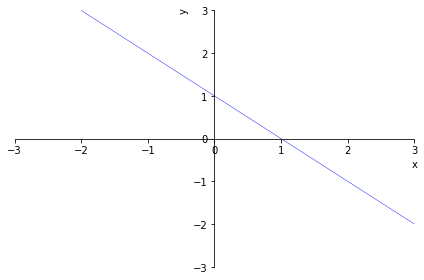

In [ ]:
plot_implicit(Eq(x + y, 1), (x, -3, 3), (y, -3, 3)) # especificando un rango

__Ejercicio:__ Grafica las siguientes funciones: 

* $x^{2}+y^{2}=1$

In [ ]:
#Escribe código aquí.
plot_implicit(Eq(x**2/9+y**2/4=1)) # sin especificar un rango
plt.show()

SyntaxError: ignored

* $x + y = 5$

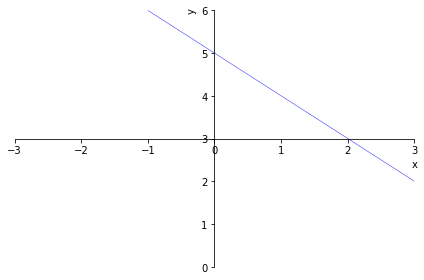

In [ ]:
#Escribe código aquí.
plot_implicit(Eq(x + y, 5),(x, -3, 3), (y, 0, 6)) # sin especificar un rango
plt.show()

* $x^{2} + y = 0$

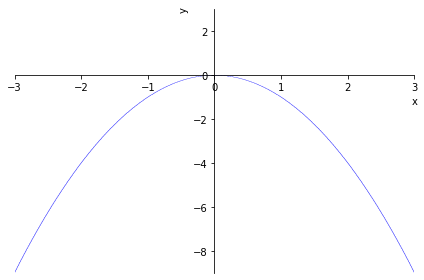

In [ ]:
#Escribe código aquí.
plot_implicit(Eq(x**2 + y, 0),(x, -3, 3), (y, -9, 3)) # sin especificar un rango
plt.show()

# Modelado matemático de un cuerpo en caída libre

**Problema**

Describir el comportamiento del movimiento de un objeto que es lanzado verticalmente desde el techo de un edificio de altura $y_0$, con una velocidad inicial $v_0$ alcanzando cierta
altura por ir frenando su ascenso la acción de la gravedad y desciende por el mismo camino
hasta caer en el piso, alcanzando con esto su altura máxima en B como lo ilustra la figura 1.
Se hace caso omiso de los efectos del aire.

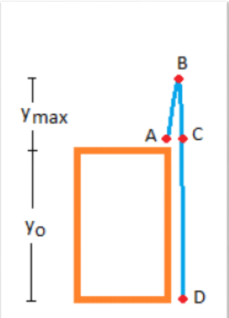

**Figura 1: Objeto lanzado desde el techo de un edificio**

**Introducción**

“El ejemplo más conocido de movimiento con aceleración (casi) constante es la caída de un
cuerpo bajo la influencia de la atracción gravitacional de la Tierra. Este fenómeno ha
interesado a filósofos y científicos desde la antigüedad. En el siglo IV a.C, Aristóteles
pensaba (erróneamente) que los objetos pesados caen con mayor rapidez que los ligeros, en
proporción con su peso. Diecinueve siglos después, Galileo afirmó que los cuerpos caían
con una aceleración constante e independiente de su peso. Según se cuenta, Galileo
experimentaba dejando caer balas desde la Torre inclinada de Pisa. Desde entonces, la
caída de los cuerpos se ha estudiado con gran precisión. Si puede descontarse el efecto del
aire, Galileo está en lo cierto; todos los cuerpos en un lugar específico caen con la misma
aceleración hacia abajo, sea cual sea su tamaño o peso. Si la distancia de caída es pequeña
en comparación con el radio terrestre, la aceleración es constante. En esta sección se
formula un modelo matemático idealizado en el que se hace caso omiso de los efectos del
aire, la rotación terrestre y la disminución de la aceleración de la altitud. A éste modelo
matemático idealizado comúnmente se le conoce con el nombre de caída libre, aunque
incluye también el movimiento ascendente.”

Adicional a esto la caída libre es el movimiento el cual se debe unica y exclusivamente a la influencia de la gravedad, todos los cuerpos que se encuentren en caida libre tienen una aceleración que va dirigida hacia abajo y cuyo valor depende del lugar en el que se encuentren, para este caso en la Tierra este valor es de aproximadamente 9.8 m/s^2, con esto podemos decir que los cuerpos que son dejados en caida libre aumentan su velocidad hacia abajo en 9.8 m/s cada segundo. Cuando lanzamos un cuerpo verticalmente hacia arriba, alcanzará una altura máxima y después el cuerpo caerá, la fase de subida y de bajada son de caída libre porque son movimientos que dependen de la gravedad.



**Definición del problema**

El problema consiste en poder formular un modelo matemático que describa la relación
entre las variables “posición de un objeto” que es lanzado verticalmente desde el techo de
un edificio de altura $y_0$, con una velocidad inicial $v_0$ alcanzando cierta altura por ir
frenando su ascenso la acción de la gravedad y desciende por el mismo camino hasta caer
en el piso y “el tiempo”.

La posición inicial es y(0) = $y_0$ y velocidad inicial y′(0) = $v_0$. La aceleración constante
de un cuerpo en caída libre se llama aceleración debida a la gravedad, y se denota su
magnitud con g. Se usa el valor aproximado de g cerca de la superficie de la superficie
terrestre 9.8 $m/s^2$. Este modelo no tiene en cuenta los efectos del aire, la rotación terrestre ni la disminución de la aceleración de la altitud.

Para resolver este problema se deben obtener expresiones matemáticas que permiten:

* Conocer la posición del cuerpo en cualquier instante del tiempo.

* Conocer la altura máxima alcanzada por el cuerpo.

* Calcular el tiempo total de vuelo del cuerpo.

De igual forma se debe tener conocimientos en caída libre y en las ecuaciones propias de los movimientos rectilíneos uniformemente acelerado (m.r.u.a) las cuales son:

$v=v_0+a⋅t$

$x=x_0+v_0t+1/2at^2$

$a=cte$

Donde:

$x, x_0$: La posición del cuerpo en un instante dado (x) y en el instante inicial $(x_0)$. Su unidad en el Sistema Internacional (S.I.) es el metro (m)

$v,v_0$: La velocidad del cuerpo en un instante dado (v) y en el instante inicial $(v_0)$. Su unidad en el Sistema Internacional es el metro por segundo (m/s)

$a$: La aceleración del cuerpo. Permanece constante y con un valor distinto de 0. Su unidad en el Sistema Internacional es el metro por segundo al cuadrado (m/s2)

$t$: El intervalo de tiempo estudiado.  Su unidad en el Sistema Internacional es el segundo (s)

**Teorías que gobiernan el problema**

Un conocimiento científico que se relaciona con este problema y permite formular los
modelos matemáticos son:

* La segunda Ley de Newton: Según $FisicaLab$ La segunda ley de Newton o principio fundamental establece que la rapidez con la que cambia el momento lineal (la intensidad de su cambio) es igual a la resultante de las fuerzas que actúan sobre él:

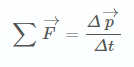

Donde:

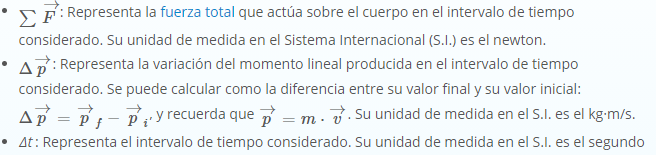

Como puedes ver, este principio relaciona matemáticamente las fuerzas con el efecto que producen, de tal forma que resulta fundamental para resolver cualquier problema de dinámica.

Ejemplo de aplicación de la segunda ley de Newton

Cuando empujas un objeto, por ejemplo una caja, aplicando una fuerza sobre él de manera sostenida, se produce un incremento de su momento lineal, representado por la flecha naranja. Ten presente que siempre que la masa a la que aplicas la fuerza se mantenga constante, el aumento del momento lineal se traducirá en un incremento de su velocidad, pues p=m·v.

* La teoría de Aristóteles:

Se basaba en que todos los cuerpos pesados caían más rápido que los ligeros. Él mencionaba que existían dos tipos de movimientos: naturales, éste a su vez se dividía en dos movimientos que era el movimiento circular de los cosmos y el movimiento hacia la superficie o hacia la atmosfera; y violentos.

El movimiento natural de un cuerpo consistía en la naturaleza formada del mismo (agua, tierra, aire, fuego), éstos se debían mover a su lugar natural y dependiendo del elemento en mayor abundancia era el que determinaba la dirección y la rapidez de éste. Una piedra grande caía más rápido que una piedra pequeña, ya que tenía más tierra.
Los movimientos violentos para Aristóteles eran aquellos que se apartaban de su trayectoria natural. Un ejemplo, que una piedra se elevara hacia atmosfera, cuando su lugar natural es la superficie.
Aristóteles también en sus estudios realizados decía que la rapidez de la caída los cuerpos era directamente proporcional a su peso y que conforme se acercara a su lugar natural su velocidad aumenta.

* El gran descubrimiento de Galileo Galilei

Según (Carlos Flores, 2012) Uno de los grandes aportes que hay en la Física, es sin duda alguna el que realizó el científico Galileo Galilei que demostró que en todos los cuerpos la aceleración de la gravedad, es igual sin importar su peso, en otras palabras, todos los cuerpos caen al mismo tiempo sin importar su peso.

Esto lo pudo comprobar con su experimento realizado desde la Torre de Pisa. Galileo arrojó dos objetos de diferente peso y mostró que caían al mismo tiempo.

En la teoría de Galilei él explica que si dos cuerpos de diferente peso caían desde el vacío en donde no hay aire, ambos caerían al mismo tiempo. No obstante, Galileo no contaba con un vacío pero pudo imaginar uno. Él dibujo un cuerpo pesado atado a un cuerpo ligero y dedujo que éste cuerpo compuesto caerían más rápido que el cuerpo pesado solo, y que el cuerpo ligero no podía retardar su caída sino que caía con más velocidad.

Sin duda alguna, las afirmaciones en la teoría de Galileo Galilei pudieron corregir la idea que se tenía durante mucho tiempo de la caída libre que descubrió Aristóteles.

* En el siglo II a.c. Hiparco de Rodas plantea la noción de ímpetus como una explicación a los fenómenos del movimiento que la teoría aristotélica no explicaba satisfactoriamente. Esta teoría es desarrollada por Juan Filopon en el siglo VI. El ímpetu es una especie de cualidad, potencia o virtud que se imprime al móvil desde el motor, para el caso de ´ los movimientos violentos. Para los movimientos naturales, como es el caso de la caída de los graves, el ímpetu impregna al móvil, debido
al hecho de estar dotado, este último, de gravedad, y por eso se moverá hacia su lugar natural como consecuencia de estar impregnado de la cualidad de ímpetus. Respecto a la caída de los cuerpos Filopon señala que Aristóteles se equivoca, pues ´ este afirma que el cuerpo mucho más pesado llegara proporcionalmente mucho antes que el otro. Y eso no sucede:
“Si dejas caer desde la misma altura dos pesos de los cuales uno es muchas veces más pesado que el otro, ´ veras que la proporción de los tiempos requeridos para el movimiento no depende de la proporción de los  pesos, sino que la diferencia en tiempos es muy pequeña”

**Formulación del modelo matemático**

Las variables de interés son: 

* El tiempo que se denominará t (variable independiente)
* La posición del cuerpo que se denominará y (variable dependiente). 

Los parámetros constantes que se manejan son: 
* La posición inicial del cuerpo que se denominará $y_0$
* La velocidad inicial del cuerpo que denominaremos $v_0$. 

Se pueden considerar también como variables de interés: 
* La posición máxima del cuerpo que se denominará $y_max$
* El tiempo en que tarda el cuerpo en caer al suelo que se denominará $t_vuelo$. 


En la figura 2 se establece el sistema de referencia vertical para el objeto en subida.

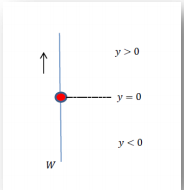

* Figura 2: Referencia de la posición y

De la figura 2 se obtiene:

$-W = ma$     (1)

$ -mg = ma$   (2)

$-g = a$      (3)

Se sabe que la aceleración es igual a la segunda derivada de la posición del cuerpo.
Entonces, la relación entre la posición del cuerpo y el tiempo viene representada por la
siguiente expresión matemática:

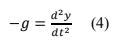



**Solución matemática del modelo**

El modelo matemático (4) es una ecuación diferencial de segundo orden. La solución se obtiene separando las variables de la siguiente manera:

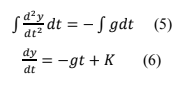

El valor de K se calcula con la condición inicial y′(0) = $v_0$.

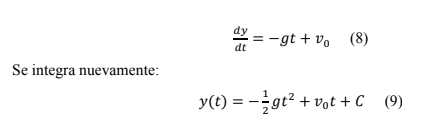

El valor de C se calcula con la condición inicial y(0) = $y_0$. Entonces, la posición del
cuerpo en función del tiempo viene dada por la expresión algebraica:

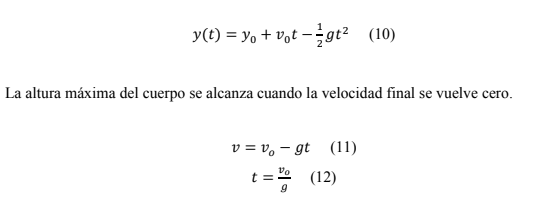

Sustituir (12) en la ecuación (10) y obtener la expresión:

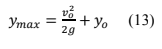

El tiempo total de vuelo se refiere al tiempo que tarda el cuerpo en llegar al suelo. Cuando
el cuerpo llega al suelo su altura es cero, por tanto y = 0.

$0=-1/2g(t^2)+v_0t+y_0$

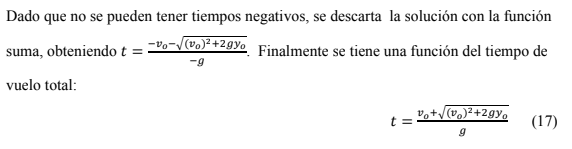

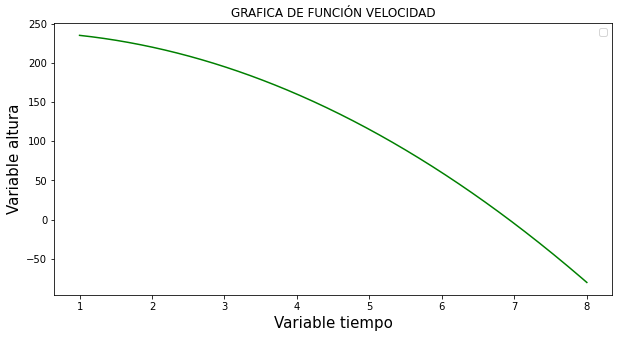

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y0= 240
v0= 0
g= 10

y=lambda t: y0+v0*t-1/2*g*t**2

t=np.linspace(1,8,500)

fv=y(t)

plt.figure(figsize=(10,5))

plt.plot(t,fv,"g-")

plt.xlabel("Variable tiempo",fontsize=15)
plt.ylabel("Variable altura",fontsize=15)
plt.title("GRAFICA DE FUNCIÓN VELOCIDAD")

plt.legend()
plt.show()

**Con velocidad inicial 0 debido a que el objeto se deja caer desde una altura de 240 metros**

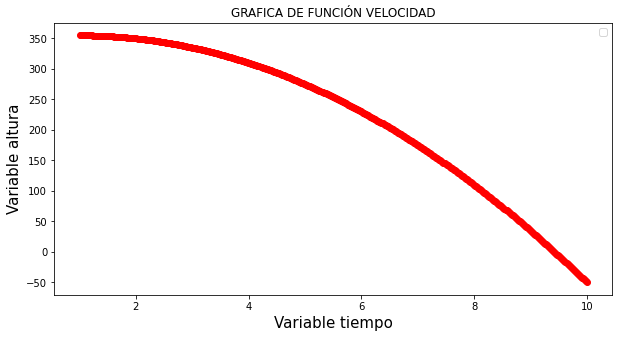

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y0= 350
v0= 10
g= 10

y=lambda t: y0+v0*t-1/2*g*t**2

t=np.linspace(1,10,500)

fy=y(t)

plt.figure(figsize=(10,5))

plt.plot(t,fy,"ro-")

plt.xlabel("Variable tiempo",fontsize=15)
plt.ylabel("Variable altura",fontsize=15)
plt.title("GRAFICA DE FUNCIÓN VELOCIDAD")

plt.legend()
plt.show()

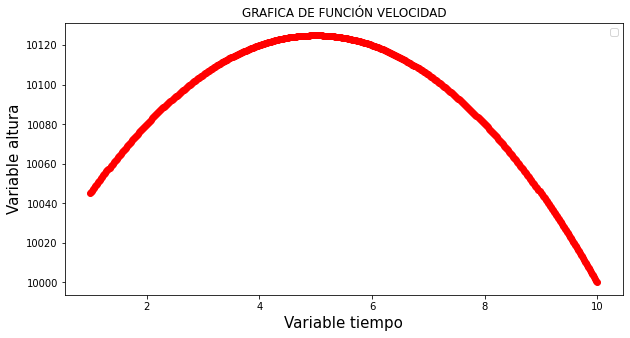

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y0= 10000
v0= 50
g= 10

y=lambda t: y0+v0*t-1/2*g*t**2

t=np.linspace(1,10,500)

fy1=y(t)

plt.figure(figsize=(10,5))

plt.plot(t,fy1,"ro-")

plt.xlabel("Variable tiempo",fontsize=15)
plt.ylabel("Variable altura",fontsize=15)
plt.title("GRAFICA DE FUNCIÓN VELOCIDAD")

plt.legend()
plt.show()

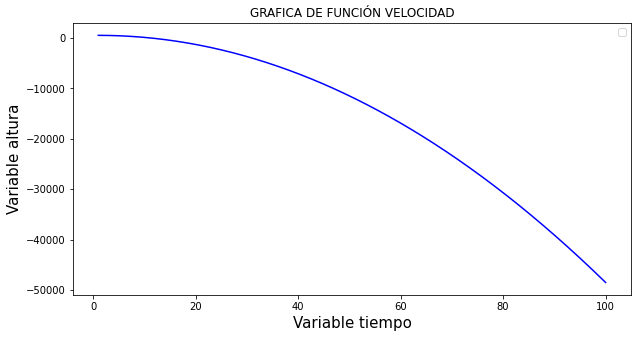

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y0= 500
v0= 10
g= 10

y=lambda t: y0+v0*t-1/2*g*t**2

t=np.linspace(1,100,500)

fy2=y(t)

plt.figure(figsize=(10,5))

plt.plot(t,fy2,"b-")

plt.xlabel("Variable tiempo",fontsize=15)
plt.ylabel("Variable altura",fontsize=15)
plt.title("GRAFICA DE FUNCIÓN VELOCIDAD")

plt.legend()
plt.show()

**Representación computacional de la solución**

Los datos de entrada son: la posición inicial del cuerpo, la velocidad inicial,
y el tiempo. Los datos de salida son la posición del cuerpo, su altura máxima y su tiempo
total de vuelo.

Se utilizó el software Wolframalpha con el fin de representar computacional mente la solución junto con los graficos respectivos, acá tenemos en cuenta diferentes cambios en la Posición inicial del objeto $y_0$ y la velocidad inicial del mismo $v_0$.

* $y_0 = 240$ y $v_0 = 0$

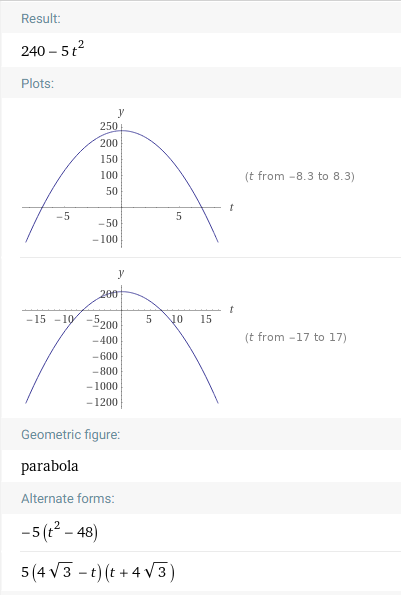


* $y_0 = 240$ y $v_0 = 0$

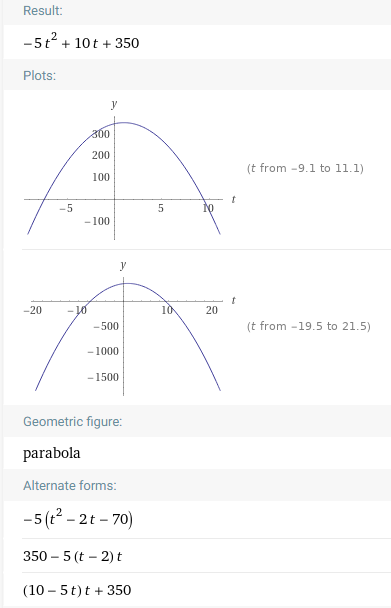

**Interpretación de los resultados**

Realizamos una tabla con las variables de interes con el fin de poder encontrar a diferentes posiciones iniciales y a diferentes velocidades iniciales el tiempo de la caída del objeto, la posición del cuerpo en función del tiempo y la altura máxima, la gravedad la dejamos constante con un valor de $10 m/s^2$. Como se muestra a continuación: 


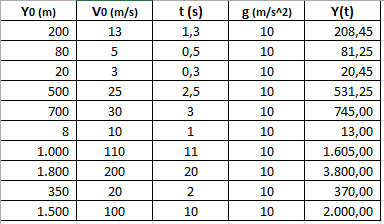

Podemos interpretar que a mayor velocidad con el que se lance un objeto a una determinada altura inicial será directamente proporcional su altura final, ya que a mayor velocidad arrojado el objeto mayor altura va a adquirir. Por ende el tiempo de caída va a ser mayor.

Cuando el objeto llegue a su altura máxima luego de ser lanzado se tendrá una velocidad en ese punto de 0 m/s y luego de este el objeto empezará con su descenso.

Por ejemplo, si arrojamos un objeto a una velocidad inicial de 200 m con diferentes velocidades una mayor a la otra nos damos cuenta que el tiempo es mayor para el objeto que se lanzó con velocidad inicial mayor y de la misma manera la altua máxima del primer objeto es mayor que la del segundo objeto, por ende se puede concluir que estas dos variables son directamente proporcionales por lo tanto con la velocidad inicial se determinará que tan alto llegará el objeto, tal como se muestra a continuación:

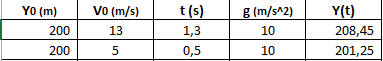

**Validación del modelo**

Se realizó una investigación acerca de los cuerpos en caída libre en donde encontramos un simulador de la página EducaPlus en la cual se procedió a realizar con cada $y_0$ anteriormente definidos las g´raficas de las variables implicadas y los valores de cada una de la siguiente forma:

[Simulador de caída libre](http://www.educaplus.org/movi/4_2caidalibre.html)

Es de tener en cuenta que el simulador nos da como valor de la gravedad $9,8m/s^2$ y por temas prácticos en la solución de nuestro modelo tomamos como gravedad $10m/s^2$.

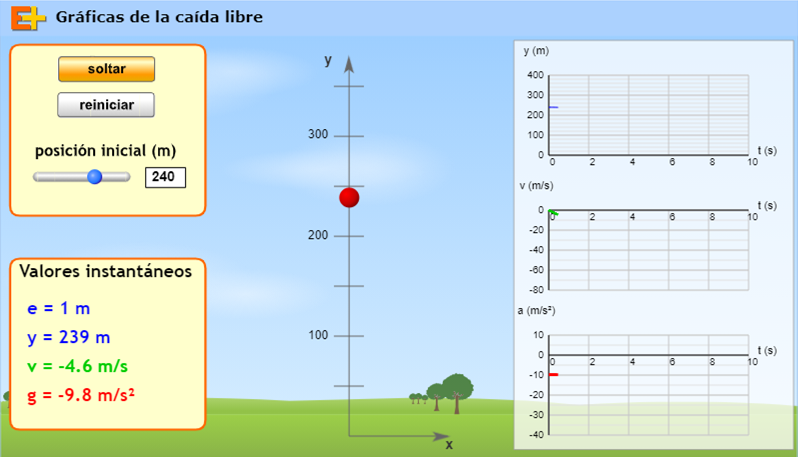

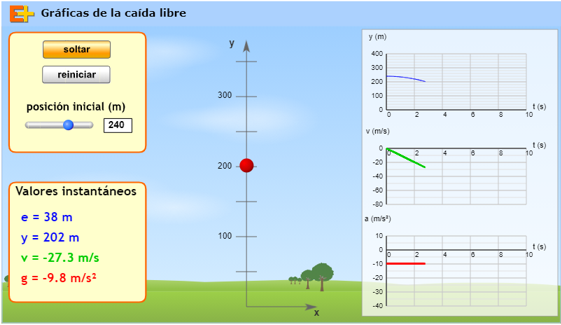

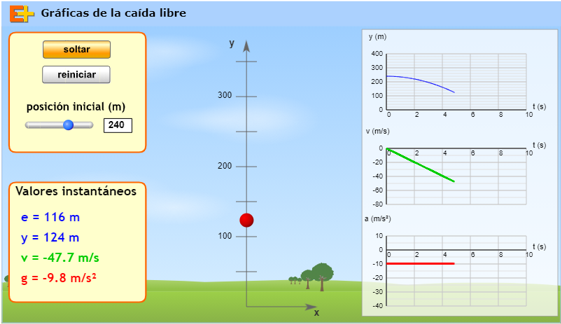

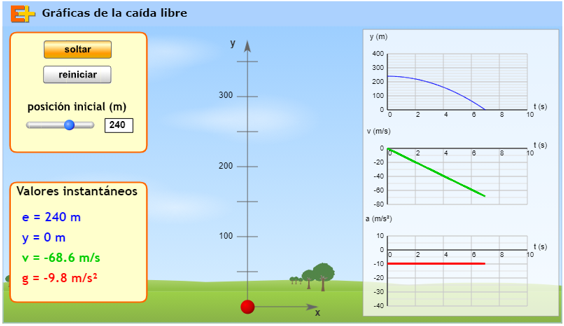

De esta forma podemos comprobar al comparar la gráfica de nuestra solución del modelo con la gráfica en el simulador de Velocidad contra altura que estas son exactamente igual en forma parabolica.

**Limitaciones del modelo**

Este modelo se podrá aplicar únicamente a objetos lanzados adrede contando con una velocidad inicial que se le haya ejecutado, es decir, que no cuenten con una velocidad incluida. Objetos que emplean energía mecanica, en el caso del aterrizaje de un avión debido a que este puede controlar la velocidad en la que aterrizará no se puede incluir dentro del modelado matemático de un cuerpo en caída libre. Además solo se incluyen los movimientos que se deban únicamente a la influencia de la fuerza de gravedad y que no tengan en cuenta la resistencia del aire.

**Referencias**

* http://www.educaplus.org/movi/4_2caidalibre.html#:~:text=Se%20le%20llama%20ca%C3%ADda%20libre,en%20el%20que%20se%20encuentren.&text=En%20la%20ca%C3%ADda%20libre%20no,cuenta%20la%20resistencia%20del%20aire.

* https://www.fisicalab.com/apartado/caida-libre

* https://www.fisicalab.com/apartado/principio-fundamental

* https://www.monografias.com/trabajos94/experimento-caida-libre-cuerpos/experimento-caida-libre-cuerpos.shtml#:~:text=alguna%20sobre%20%C3%A9stos.-,Teor%C3%ADa%20de%20Arist%C3%B3teles%3A%20Ca%C3%ADda%20Libre,m%C3%A1s%20r%C3%A1pido%20que%20los%20ligeros.&text=La%20teor%C3%ADa%20propuesta%20por%20Arist%C3%B3teles,lo%20atrae%20con%20mayor%20fuerza.

* Aristoteles, ´ F´ısica, Libro IV, Cap. 8. Se puede consultar The
Works of Aristotle translated into English, 12 vols (vol 1), Ed.
J. A. Smith & W. D. Ross, Oxford University Press, Oxford
(1957-8)

* W. K. C. Gutthrie, Los filosofos griegos. De Tales a Aristóteles ´ ,
2
a
. Edicion, Fondo de Cultura Económica, México (1994) p. ´137.
